In [22]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import os
import pandas as pd
%matplotlib inline

print("Checking files in data location ...")
drop_dir = '/Users/Gabriel/Dropbox/Research/ASPIDE/Datasets/ECI Chaos/Distributed Phase 1/'
print(check_output(["ls", drop_dir]).decode("utf8"))

df_anomaly = pd.read_csv(os.path.join(drop_dir,"df_anomaly_single_distributed.csv"))


Checking files in data location ...
df_anomaly_single_distributed.csv
done
finalized
logs
processed
todo



In [23]:
df_anomaly.columns

Index(['node_arp_entries_10.251.0.105:9100',
       'node_arp_entries_10.251.0.114:9100',
       'node_arp_entries_10.251.0.192:9100',
       'node_arp_entries_10.251.0.25:9100',
       'node_boot_time_seconds_10.251.0.105:9100',
       'node_boot_time_seconds_10.251.0.114:9100',
       'node_boot_time_seconds_10.251.0.192:9100',
       'node_boot_time_seconds_10.251.0.25:9100',
       'node_context_switches_total_10.251.0.105:9100',
       'node_context_switches_total_10.251.0.114:9100',
       ...
       'target_cpu_1', 'target_mem_1', 'target_copy_1', 'target_dummy_1',
       'target_ddot_1', 'target_cpu_master', 'target_mem_master',
       'target_copy_master', 'target_dummy_master', 'target_ddot_master'],
      dtype='object', length=793)

In [24]:
print(df_anomaly.columns.values)

['node_arp_entries_10.251.0.105:9100' 'node_arp_entries_10.251.0.114:9100'
 'node_arp_entries_10.251.0.192:9100' 'node_arp_entries_10.251.0.25:9100'
 'node_boot_time_seconds_10.251.0.105:9100'
 'node_boot_time_seconds_10.251.0.114:9100'
 'node_boot_time_seconds_10.251.0.192:9100'
 'node_boot_time_seconds_10.251.0.25:9100'
 'node_context_switches_total_10.251.0.105:9100'
 'node_context_switches_total_10.251.0.114:9100'
 'node_context_switches_total_10.251.0.192:9100'
 'node_context_switches_total_10.251.0.25:9100'
 'node_cpu_guest_seconds_total_10.251.0.105:9100'
 'node_cpu_guest_seconds_total_10.251.0.114:9100'
 'node_cpu_guest_seconds_total_10.251.0.192:9100'
 'node_cpu_guest_seconds_total_10.251.0.25:9100'
 'node_cpu_seconds_total_10.251.0.105:9100'
 'node_cpu_seconds_total_10.251.0.114:9100'
 'node_cpu_seconds_total_10.251.0.192:9100'
 'node_cpu_seconds_total_10.251.0.25:9100'
 'node_disk_io_now_10.251.0.105:9100' 'node_disk_io_now_10.251.0.114:9100'
 'node_disk_io_now_10.251.0.192:

In [25]:
col_names_plt = list(df_anomaly.columns.values)
new_col_filter = []
for col in col_names_plt:
    if '*_10.251.0.144:9100' in col:
        new_col_filter.append(col)
    if 'time' == col:
        new_col_filter.append(col)
    #
print(new_col_filter)

['time']


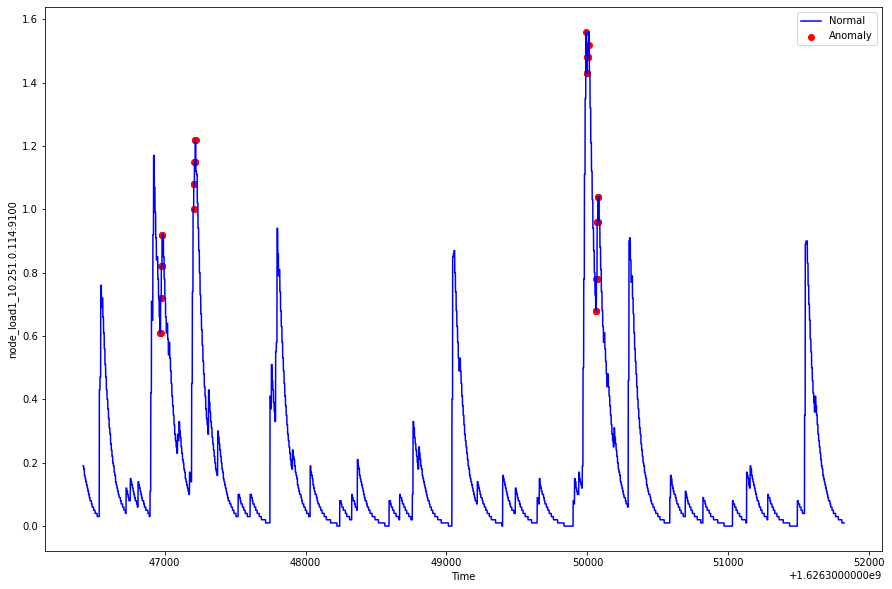

In [26]:

fig, ax = plt.subplots(figsize=(15,10))
a = df_anomaly.loc[df_anomaly['target_cpu_master'] == 1, ['time', "node_load1_10.251.0.114:9100"]] #anomaly
ax.plot(df_anomaly['time'], df_anomaly['node_load1_10.251.0.114:9100'], color='blue', label='Normal')
ax.scatter(a['time'],a["node_load1_10.251.0.114:9100"], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('node_load1_10.251.0.114:9100')
plt.legend()
plt.show();

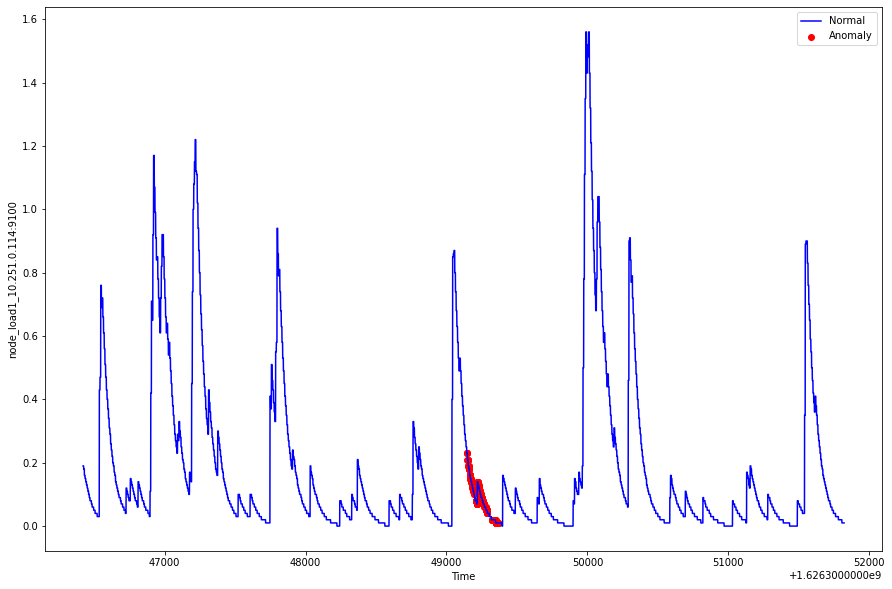

In [27]:
feature = "node_load1_10.251.0.114:9100"
anomaly_col = 'target_mem_1'
fig, ax = plt.subplots(figsize=(15,10))
a = df_anomaly.loc[df_anomaly[anomaly_col] == 1, ['time', feature]] #anomaly
ax.plot(df_anomaly['time'], df_anomaly[feature], color='blue', label='Normal')
ax.scatter(a['time'],a[feature], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel(feature)
plt.legend()
plt.show();

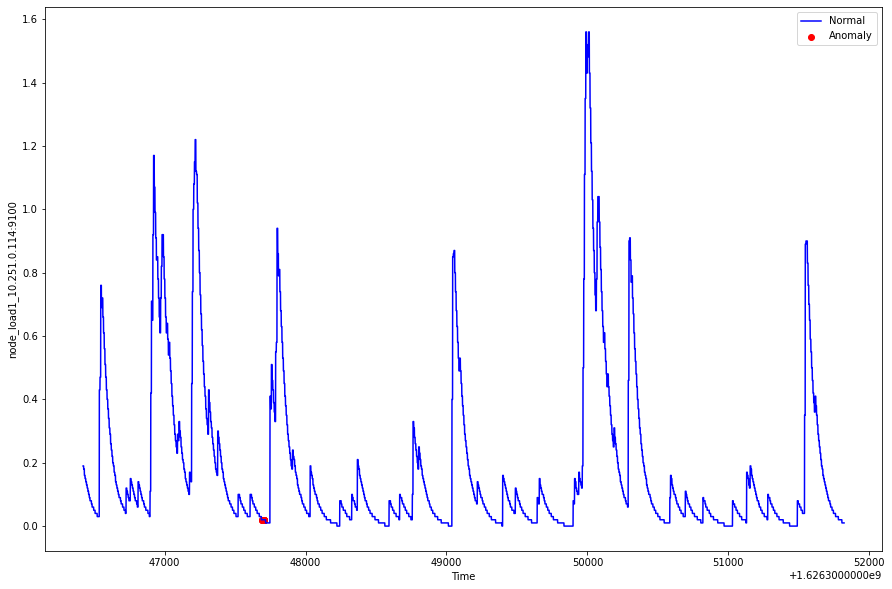

In [28]:
feature = "node_load1_10.251.0.114:9100"
anomaly_col = 'target_cpu_3'
fig, ax = plt.subplots(figsize=(15,10))
a = df_anomaly.loc[df_anomaly[anomaly_col] == 1, ['time', feature]] #anomaly
ax.plot(df_anomaly['time'], df_anomaly[feature], color='blue', label='Normal')
ax.scatter(a['time'],a[feature], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel(feature)
plt.legend()
plt.show();

In [29]:
df_anomaly.columns

Index(['node_arp_entries_10.251.0.105:9100',
       'node_arp_entries_10.251.0.114:9100',
       'node_arp_entries_10.251.0.192:9100',
       'node_arp_entries_10.251.0.25:9100',
       'node_boot_time_seconds_10.251.0.105:9100',
       'node_boot_time_seconds_10.251.0.114:9100',
       'node_boot_time_seconds_10.251.0.192:9100',
       'node_boot_time_seconds_10.251.0.25:9100',
       'node_context_switches_total_10.251.0.105:9100',
       'node_context_switches_total_10.251.0.114:9100',
       ...
       'target_cpu_1', 'target_mem_1', 'target_copy_1', 'target_dummy_1',
       'target_ddot_1', 'target_cpu_master', 'target_mem_master',
       'target_copy_master', 'target_dummy_master', 'target_ddot_master'],
      dtype='object', length=793)

In [30]:
target_cpu_master  = df_anomaly.target_cpu_master
target_mem_master = df_anomaly.target_mem_master
target_copy_master = df_anomaly.target_copy_master
target_dummy_master = df_anomaly.target_dummy_master
target_ddot_master = df_anomaly.target_ddot_master
time = df_anomaly.time
# target_ddot_master.value_counts()
# target_mem_master.value_counts()
# target_copy_master.value_counts()
# target_cpu_master.value_counts()

In [31]:
# For single node filtering
node_wild_card = "10.251.0.114:9100"

filtr_list = []
mask = df_anomaly.columns.str.contains(node_wild_card)
filtr_list.extend(list(df_anomaly.loc[:,mask].columns.values))
df_anomaly = df_anomaly[filtr_list]
df_anomaly


,node_arp_entries_10.251.0.114:9100,node_boot_time_seconds_10.251.0.114:9100,node_context_switches_total_10.251.0.114:9100,node_cpu_guest_seconds_total_10.251.0.114:9100,node_cpu_seconds_total_10.251.0.114:9100,node_disk_io_now_10.251.0.114:9100,node_disk_io_time_seconds_total_10.251.0.114:9100,node_disk_io_time_weighted_seconds_total_10.251.0.114:9100,node_disk_read_bytes_total_10.251.0.114:9100,node_disk_read_time_seconds_total_10.251.0.114:9100,...,node_timex_tai_offset_seconds_10.251.0.114:9100,node_timex_tick_seconds_10.251.0.114:9100,node_uname_info_10.251.0.114:9100,node_vmstat_oom_kill_10.251.0.114:9100,node_vmstat_pgfault_10.251.0.114:9100,node_vmstat_pgmajfault_10.251.0.114:9100,node_vmstat_pgpgin_10.251.0.114:9100,node_vmstat_pgpgout_10.251.0.114:9100,node_vmstat_pswpin_10.251.0.114:9100,node_vmstat_pswpout_10.251.0.114:9100
0,6,1620821678,3134344244,0,62813.44,0,27134.952,183993.644,37908859904,1186.772,...,0,0.01,1,0,607523656,7780,37020380,607396787,0,0
1,6,1620821678,3134344917,0,62813.44,0,27135.092,183994.548,37908859904,1186.772,...,0,0.01,1,0,607523657,7780,37020380,607399451,0,0
2,6,1620821678,3134345440,0,62813.45,0,27135.092,183994.548,37908859904,1186.772,...,0,0.01,1,0,607523657,7780,37020380,607399451,0,0
3,6,1620821678,3134346007,0,62813.46,0,27135.092,183994.548,37908859904,1186.772,...,0,0.01,1,0,607523657,7780,37020380,607399451,0,0
4,6,1620821678,3134346594,0,62813.46,0,27135.092,183994.548,37908859904,1186.772,...,0,0.01,1,0,607523657,7780,37020380,607399451,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,6,1620821678,3137642301,0,62962.45,0,27177.900,184690.064,37909949440,1187.744,...,0,0.01,1,0,613618210,7808,37021444,613239755,0,0
5396,6,1620821678,3137642690,0,62962.46,0,27177.900,184690.064,37909949440,1187.744,...,0,0.01,1,0,613618222,7808,37021444,613239755,0,0
5397,6,1620821678,3137643341,0,62962.46,0,27177.900,184690.064,37909949440,1187.744,...,0,0.01,1,0,613618232,7808,37021444,613239755,0,0
5398,6,1620821678,3137644033,0,62962.48,0,27177.900,184690.064,37909949440,1187.744,...,0,0.01,1,0,613618242,7808,37021444,613239755,0,0


In [32]:
df_anomaly['time'] = time
df_anomaly['target_cpu_master'] = target_cpu_master
df_anomaly['target_mem_master'] = df_anomaly.target_cpu_master
df_anomaly['target_copy_master'] = target_copy_master
df_anomaly['target_dummy_master'] = target_dummy_master
df_anomaly['target_ddot_master'] = target_ddot_master


In [33]:
df_anomaly

,node_arp_entries_10.251.0.114:9100,node_boot_time_seconds_10.251.0.114:9100,node_context_switches_total_10.251.0.114:9100,node_cpu_guest_seconds_total_10.251.0.114:9100,node_cpu_seconds_total_10.251.0.114:9100,node_disk_io_now_10.251.0.114:9100,node_disk_io_time_seconds_total_10.251.0.114:9100,node_disk_io_time_weighted_seconds_total_10.251.0.114:9100,node_disk_read_bytes_total_10.251.0.114:9100,node_disk_read_time_seconds_total_10.251.0.114:9100,...,node_vmstat_pgpgin_10.251.0.114:9100,node_vmstat_pgpgout_10.251.0.114:9100,node_vmstat_pswpin_10.251.0.114:9100,node_vmstat_pswpout_10.251.0.114:9100,time,target_cpu_master,target_mem_master,target_copy_master,target_dummy_master,target_ddot_master
0,6,1620821678,3134344244,0,62813.44,0,27134.952,183993.644,37908859904,1186.772,...,37020380,607396787,0,0,1.626346e+09,0,0,0,0,0
1,6,1620821678,3134344917,0,62813.44,0,27135.092,183994.548,37908859904,1186.772,...,37020380,607399451,0,0,1.626346e+09,0,0,0,0,0
2,6,1620821678,3134345440,0,62813.45,0,27135.092,183994.548,37908859904,1186.772,...,37020380,607399451,0,0,1.626346e+09,0,0,0,0,0
3,6,1620821678,3134346007,0,62813.46,0,27135.092,183994.548,37908859904,1186.772,...,37020380,607399451,0,0,1.626346e+09,0,0,0,0,0
4,6,1620821678,3134346594,0,62813.46,0,27135.092,183994.548,37908859904,1186.772,...,37020380,607399451,0,0,1.626346e+09,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,6,1620821678,3137642301,0,62962.45,0,27177.900,184690.064,37909949440,1187.744,...,37021444,613239755,0,0,1.626352e+09,0,0,0,0,0
5396,6,1620821678,3137642690,0,62962.46,0,27177.900,184690.064,37909949440,1187.744,...,37021444,613239755,0,0,1.626352e+09,0,0,0,0,0
5397,6,1620821678,3137643341,0,62962.46,0,27177.900,184690.064,37909949440,1187.744,...,37021444,613239755,0,0,1.626352e+09,0,0,0,0,0
5398,6,1620821678,3137644033,0,62962.48,0,27177.900,184690.064,37909949440,1187.744,...,37021444,613239755,0,0,1.626352e+09,0,0,0,0,0


In [34]:
save_dir = '/Users/Gabriel/Dropbox/Research/ASPIDE/Datasets/ECI Chaos/Distributed Phase 1/processed'
df_anomaly.to_csv(os.path.join(save_dir, 'df_anomaly_single_node.csv'))